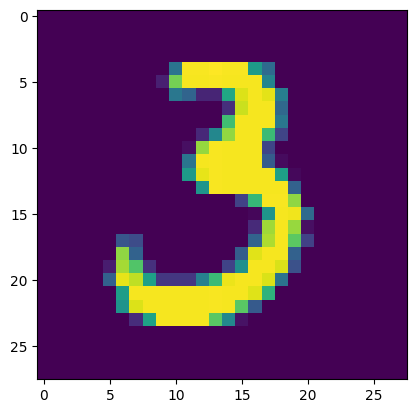

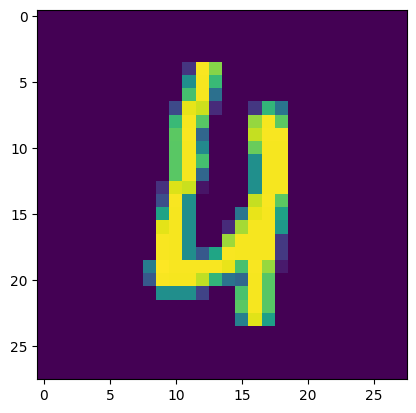

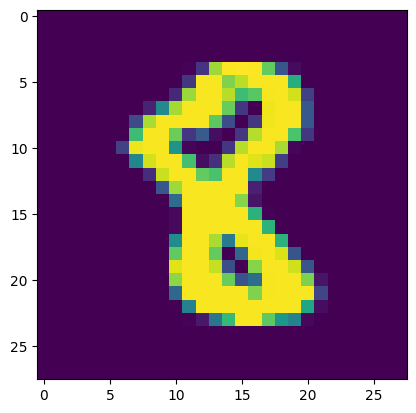

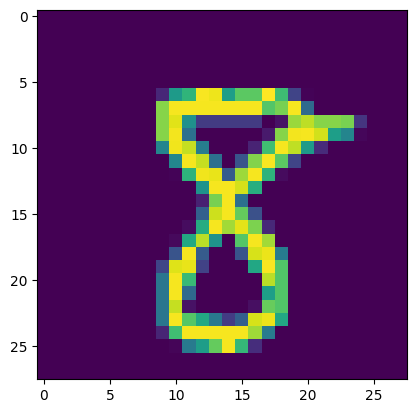

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 171s 90ms/step - accuracy: 0.9172 - loss: 0.5889 - val_accuracy: 0.9702 - val_loss: 0.0946
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 183s 97ms/step - accuracy: 0.9786 - loss: 0.0700 - val_accuracy: 0.9744 - val_loss: 0.0850
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 185s 89ms/step - accuracy: 0.9865 - loss: 0.0429 - val_accuracy: 0.9708 - val_loss: 0.1318
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 88ms/step - accuracy: 0.9888 - loss: 0.0359 - val_accuracy: 0.9754 - val_loss: 0.1091
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 205s 89ms/step - accuracy: 0.9910 - loss: 0.0289 - val_accuracy: 0.9794 - val_loss: 0.0816
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 197s 87ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.9777 - val_loss: 0.1117
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 204s 88ms/step - accuracy: 0.9940 - loss: 0.0199 - val_accuracy: 0.9804 - val_loss: 0.1157
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 198s 86ms/step - accuracy: 

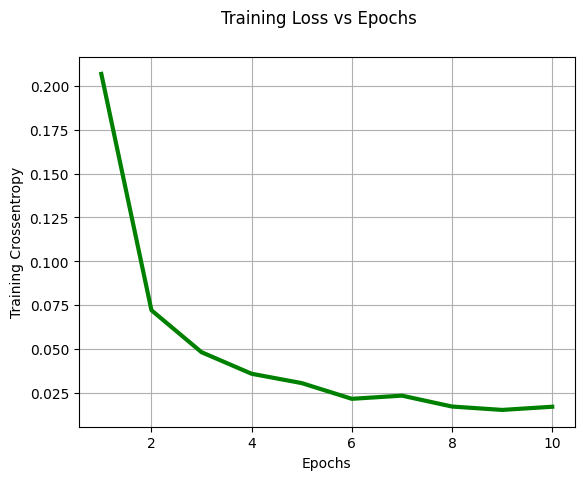

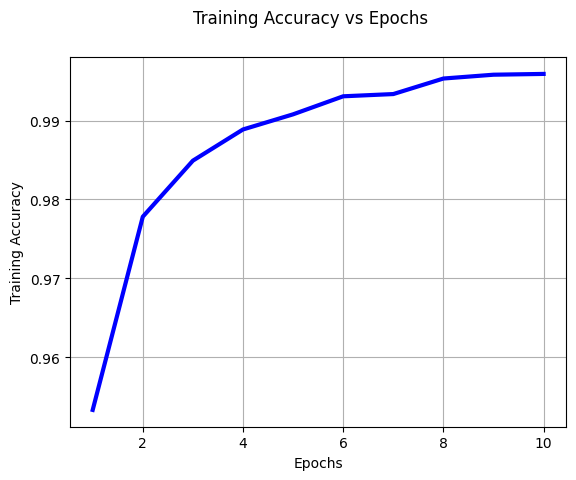

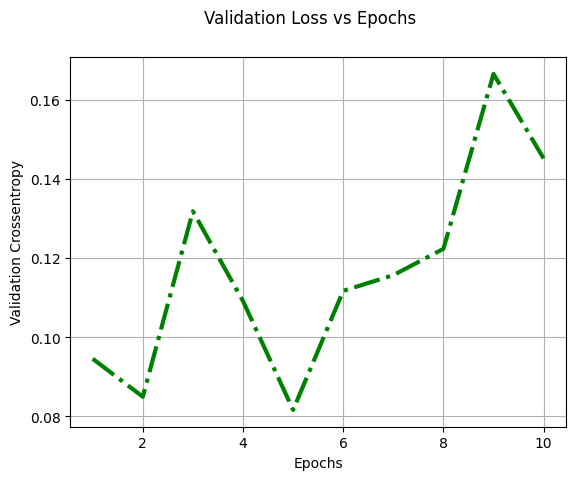

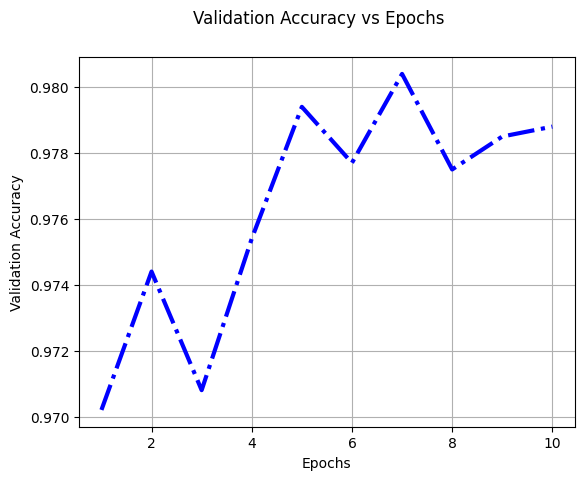

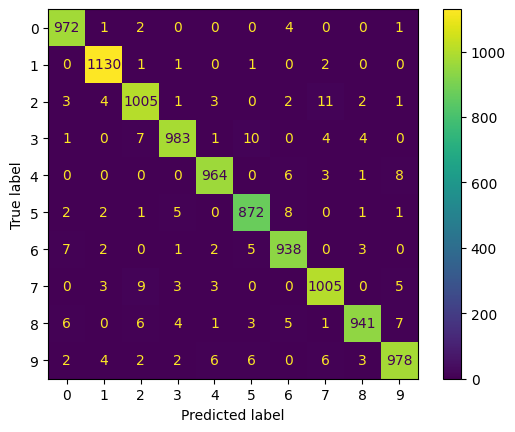

In [ ]:
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, Flatten
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
nc = 10

#MNIST dataset will be used that is packaged as part of the TensorFlow installation.
#This MNIST dataset is a set of 28×28 pixel grayscale images which represent
#hand-written digits.  It has 60,000 training rows, 10,000 testing rows,
#and 5,000 validation rows. It is a very common, basic, image classification
#dataset that is used in machine learning.
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(3)
imgplot3 = plt.imshow(Xtest[nr.randint(10000)])
plt.show()

plt.figure(4)
imgplot4 = plt.imshow(Xtest[nr.randint(10000)])
plt.show()

Xtrain = Xtrain.reshape(60000,28,28,1)
Xtest = Xtest.reshape(10000,28,28,1)

ytrainEnc = tf.one_hot(ytrain, depth=nc)
ytestEnc = tf.one_hot(ytest, depth=nc)

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(Xtrain, ytrainEnc, validation_data=(Xtest, ytestEnc), epochs=10)

ypred = model.predict(Xtest)
ypred = np.argmax(ypred,axis=1)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')

cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')

plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()